Importing pandas and matplotlib.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

Reading the CSV for cases

In [84]:
cases = pd.read_csv("../../../../data/stage_I/covid_confirmed_usafacts.csv", delimiter=",")

I chose washington as my state. Below, I'm getting the the confirmed cases for washington state only.

In [85]:
w_cases= cases[cases['State']=='WA']

I need the last week's data for confirmed cases. So, x is defined as the last 7 columns which is the last 7 days of my data. y is defined as the sum of all cases of all the counties of washington state to form the totla confirmed cases in washington.

In [86]:
x=list(w_cases.columns[-7:])
y=list(w_cases.sum())[-7:]

Below, I plot the data for last week's trend.

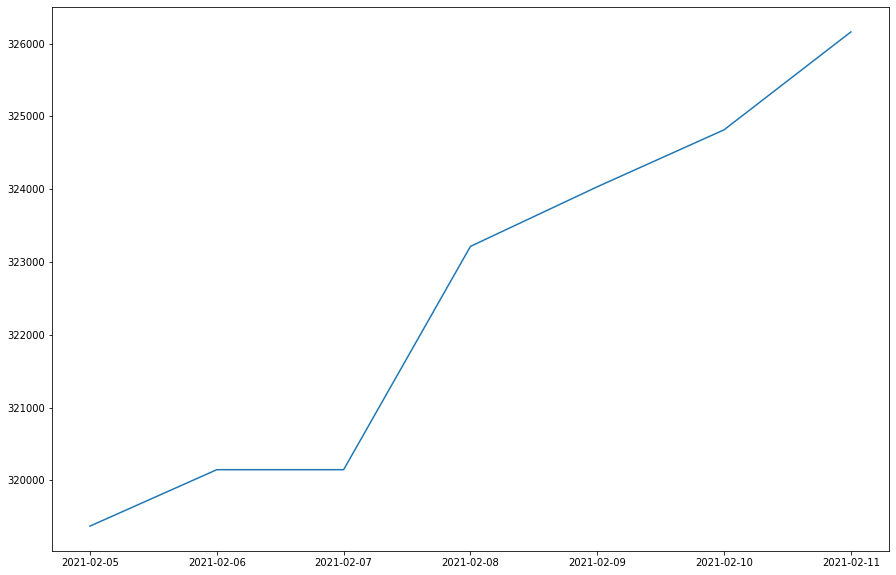

In [87]:
plt.figure(figsize=(15,10))
plt.plot(x, y, linestyle= 'solid')

As we can see above, the cases are increasing. We can see that, the state did not have a high rise(was steady and saw no increase) between 2021-02-06 and 2021-02-07. But, overall, the cases seem to have slowed after 2021-02-08 as the slope does not seem as high. Our data starts from ~319500 and caps off at ~326000. So, in the latest week of our data, we have 6500 confirmed cases in a week for the state of Washington.

Reading my enrichment data below.

In [88]:
economy = pd.read_csv("../../../../data/stage_I/Economy_5_years.csv", delimiter=",")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,6,7,8,9,10,11,12,13,14,15,18,19,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,150,151,152,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,182,183,184,185,186,187,188,189,190,191,194,195,198,199,200,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,2

The GEO_ID is a long string that has the county FIPS at the end with the last 5 string being the actual county FIPS. So, I need to remove the beginning of the actual county FIPS and rename it to merge the data. So, I created a new column.

Displaying the enrichment dataset.

In [90]:
economy

,GEO_ID,NAME,DP04_0001E,DP04_0001M,DP04_0001PE,DP04_0001PM,DP04_0002E,DP04_0002M,DP04_0002PE,DP04_0002PM,DP04_0003E,DP04_0003M,DP04_0003PE,DP04_0003PM,DP04_0004E,DP04_0004M,DP04_0004PE,DP04_0004PM,DP04_0005E,DP04_0005M,DP04_0005PE,DP04_0005PM,DP04_0006E,DP04_0006M,DP04_0006PE,DP04_0006PM,DP04_0007E,DP04_0007M,DP04_0007PE,DP04_0007PM,DP04_0008E,DP04_0008M,DP04_0008PE,DP04_0008PM,DP04_0009E,DP04_0009M,DP04_0009PE,DP04_0009PM,DP04_0010E,DP04_0010M,...,DP04_0134E,DP04_0134M,DP04_0134PE,DP04_0134PM,DP04_0135E,DP04_0135M,DP04_0135PE,DP04_0135PM,DP04_0136E,DP04_0136M,DP04_0136PE,DP04_0136PM,DP04_0137E,DP04_0137M,DP04_0137PE,DP04_0137PM,DP04_0138E,DP04_0138M,DP04_0138PE,DP04_0138PM,DP04_0139E,DP04_0139M,DP04_0139PE,DP04_0139PM,DP04_0140E,DP04_0140M,DP04_0140PE,DP04_0140PM,DP04_0141E,DP04_0141M,DP04_0141PE,DP04_0141PM,DP04_0142E,DP04_0142M,DP04_0142PE,DP04_0142PM,DP04_0143E,DP04_0143M,DP04_0143PE,DP04_0143PM
0,id,Geographic Area Name,Estimate!!HOUSING OCCUPANCY!!Total housing units,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Percent!!HOUSING OCCUPANCY!!Total housing units,Percent Margin of Error!!HOUSING OCCUPANCY!!To...,Estimate!!HOUSING OCCUPANCY!!Total housing uni...,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Percent!!HOUSING OCCUPANCY!!Total housing unit...,Percent Margin of Error!!HOUSING OCCUPANCY!!To...,Estimate!!HOUSING OCCUPANCY!!Total housing uni...,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Percent!!HOUSING OCCUPANCY!!Total housing unit...,Percent Margin of Error!!HOUSING OCCUPANCY!!To...,Estimate!!HOUSING OCCUPANCY!!Total housing uni...,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Percent!!HOUSING OCCUPANCY!!Total housing unit...,Percent Margin of Error!!HOUSING OCCUPANCY!!To...,Estimate!!HOUSING OCCUPANCY!!Total housing uni...,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Percent!!HOUSING OCCUPANCY!!Total housing unit...,Percent Margin of Error!!HOUSING OCCUPANCY!!To...,Estimate!!UNITS IN STRUCTURE!!Total housing units,Margin of Error!!UNITS IN STRUCTURE!!Total hou...,Percent!!UNITS IN STRUCTURE!!Total housing units,Percent Margin of Error!!UNITS IN STRUCTURE!!T...,Estimate!!UNITS IN STRUCTURE!!Total housing un...,Margin of Error!!UNITS IN STRUCTURE!!Total hou...,Percent!!UNITS IN STRUCTURE!!Total housing uni...,Percent Margin of Error!!UNITS IN STRUCTURE!!T...,Estimate!!UNITS IN STRUCTURE!!Total housing un...,Margin of Error!!UNITS IN STRUCTURE!!Total hou...,Percent!!UNITS IN STRUCTURE!!Total housing uni...,Percent Margin of Error!!UNITS IN STRUCTURE!!T...,Estimate!!UNITS IN STRUCTURE!!Total housing un...,Margin of Error!!UNITS IN STRUCTURE!!Total hou...,Percent!!UNITS IN STRUCTURE!!Total housing uni...,Percent Margin of Error!!UNITS IN STRUCTURE!!T...,Estimate!!UNITS IN STRUCTURE!!Total housing un...,Margin of Error!!UNITS IN STRUCTURE!!Total hou...,...,Estimate!!GROSS RENT!!Occupied units paying re...,Margin of Error!!GROSS RENT!!Occupied units pa...,Percent!!GROSS RENT!!Occupied units paying ren...,Percent Margin of Error!!GROSS RENT!!Occupied ...,Estimate!!GROSS RENT!!Occupied units paying re...,Margin of Error!!GROSS RENT!!Occupied units pa...,Percent!!GROSS RENT!!Occupied units paying ren...,Percent Margin of Error!!GROSS RENT!!Occupied ...,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEH...,Margin of Error!!GROSS RENT AS A PERCENTAGE OF...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEH...,Margin of Error!!GROSS RENT AS A PERCENTAGE OF...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEH...,Margin of Error!!GROSS RENT AS A PERCENTAGE OF...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEH...,Margin of Error!!GROSS RENT AS A PERCENTAGE OF...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Mar

In [91]:
economy['countyFIPS'] = economy.GEO_ID.str.replace('0500000US', '')

Dropping the sub heading as it is a string and we do not need that.

In [92]:
economy.drop(0,inplace=True)

Dropping the GEO_ID because I have created county FIPS and do not need GEO_ID anymore.

In [ ]:
economy.drop('GEO_ID', axis = 1)

I converted county FIPS to int as I need the int datatype to merge.

In [94]:
economy['countyFIPS']=economy['countyFIPS'].astype(int)

Reading the superDatatset below to merge with the enrichment dataset.

In [95]:
superDataset = pd.read_csv("../../../../data/stage_I/superDataset.csv", delimiter=",")

Merging the two dataset.

In [96]:
enrichmentDataset = superDataset.merge(economy, left_on = ['countyFIPS'], right_on = ['countyFIPS'])

Displaying the dataset.

In [97]:
enrichmentDataset

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-22_deaths,2020-01-23_cases,2020-01-23_deaths,2020-01-24_cases,2020-01-24_deaths,2020-01-25_cases,2020-01-25_deaths,2020-01-26_cases,2020-01-26_deaths,2020-01-27_cases,2020-01-27_deaths,2020-01-28_cases,2020-01-28_deaths,2020-01-29_cases,2020-01-29_deaths,2020-01-30_cases,2020-01-30_deaths,2020-01-31_cases,2020-01-31_deaths,2020-02-01_cases,2020-02-01_deaths,2020-02-02_cases,2020-02-02_deaths,2020-02-03_cases,2020-02-03_deaths,2020-02-04_cases,2020-02-04_deaths,2020-02-05_cases,2020-02-05_deaths,2020-02-06_cases,2020-02-06_deaths,2020-02-07_cases,2020-02-07_deaths,2020-02-08_cases,...,DP04_0134E,DP04_0134M,DP04_0134PE,DP04_0134PM,DP04_0135E,DP04_0135M,DP04_0135PE,DP04_0135PM,DP04_0136E,DP04_0136M,DP04_0136PE,DP04_0136PM,DP04_0137E,DP04_0137M,DP04_0137PE,DP04_0137PM,DP04_0138E,DP04_0138M,DP04_0138PE,DP04_0138PM,DP04_0139E,DP04_0139M,DP04_0139PE,DP04_0139PM,DP04_0140E,DP04_0140M,DP04_0140PE,DP04_0140PM,DP04_0141E,DP04_0141M,DP04_0141PE,DP04_0141PM,DP04_0142E,DP04_0142M,DP04_0142PE,DP04_0142PM,DP04_0143E,DP04_0143M,DP04_0143PE,DP04_0143PM
0,1001,Autauga County,AL,1,55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,986,35,(X),(X),698,297,(X),(X),4905,488,4905,(X),613,199,12.5,3.7,498,170,10.2,3.4,850,258,17.3,4.9,557,249,11.4,4.9,432,182,8.8,3.5,1955,331,39.9,6.6,810,299,(X),(X)
1,1003,Baldwin County,AL,1,223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1020,31,(X),(X),2468,470,(X),(X),17335,1011,17335,(X),2208,462,12.7,2.6,2484,426,14.3,2.4,2391,361,13.8,2.2,2115,411,12.2,2.1,1657,361,9.6,2.0,6480,720,37.4,3.5,2699,492,(X),(X)
2,1005,Barbour County,AL,1,24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,576,21,(X),(X),362,103,(X),(X),2979,251,2979,(X),450,137,15.1,4.2,350,121,11.7,4.0,426,123,14.3,4.1,286,98,9.6,3.3,250,104,8.4,3.4,1217,195,40.9,5.4,675,154,(X),(X)
3,1007,Bibb County,AL,1,22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,734,94,(X),(X),316,131,(X),(X),1406,284,1406,(X),358,136,25.5,9.0,94,85,6.7,5.9,108,71,7.7,4.8,163,93,11.6,6.3,113,72,8.0,5.0,570,200,40.5,10.8,357,134,(X),(X)
4,1009,Blount County,AL,1,57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,667,29,(X),(X),933,248,(X),(X),3317,356,3317,(X),570,163,17.2,5.1,342,118,10.3,3.3,582,207,17.5,5.8,352,144,10.6,4.2,329,125,9.9,3.6,1142,226,34.4,5.6,1107,267,(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,56,42343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,861,53,(X),(X),186,80,(X),(X),3353,373,3353,(X),796,228,23.7,6.2,644,179,19.2,4.6,384,141,11.5,4.1,264,115,7.9,3.3,333,144,9.9,4.4,932,231,27.8,6,338,128,(X),(X)
3138,56039,Teton County,WY,56,23464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1376,134,(X),(X),204,127,(X),(X),3367,458,3367,(X),651,240,19.3,6.7,185,130,5.5,3.7,744,230,22.1,5.9,617,220,18.3,6.6,358,188,10.6,5.2,812,247,24.1,6.8,204,127,(X),(X)
3139,56041,Uinta County,WY,56,20226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,698,47,(X),(X),151,89,(X),(X),1592,256,1592,(X),295,121,18.5,7.4,257,132,16.1,7.9,312,121,19.6,7.3,220,127,13.8,7.3,95,98,6,5.9,413,158,25.9,9.2,151,89,(X),(X)
3140,56043,Washakie County,WY,56,7805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,640,83,(X),(X),149,59,(X),(X),642,123,642,(X),99,71,15.4,9.9,118,61,18.4,8.8,103,60,16,8.4,104,54,16.2,8.3,9,13,1.4,2.1,209,70,32.6,11,149,59,(X),(X)
